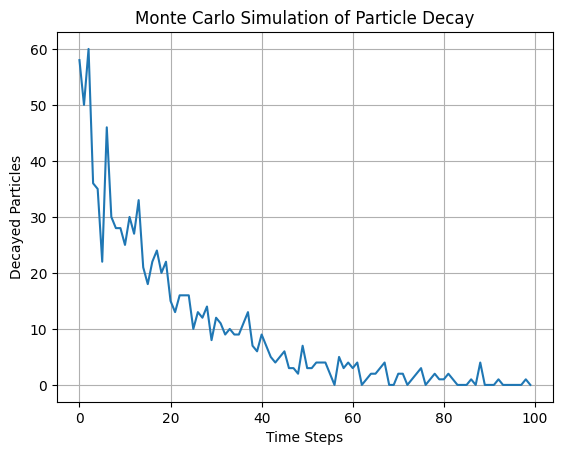

In [1]:
### 8/7/23 in class, (3)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 1000    # Number of particles in the simulation
decay_prob = 0.05       # Probability of particle decay in a time step
num_steps = 100         # Number of time steps

# Arrays to store the particle status (0 for undecayed, 1 for decayed)
particles = np.zeros(num_particles, dtype=int)

# Function to simulate particle decay using Monte Carlo method
def simulate_decay(particles, decay_prob):
    decayed_particles = 0
    for i in range(len(particles)):
        if particles[i] == 0:
            if np.random.rand() < decay_prob:
                particles[i] = 1
                decayed_particles += 1
    return decayed_particles

# Main simulation loop
decayed_counts = []
for step in range(num_steps):
    decayed_particles = simulate_decay(particles, decay_prob)
    decayed_counts.append(decayed_particles)

# Plot the decayed particle counts over time
time_steps = np.arange(num_steps)
plt.plot(time_steps, decayed_counts)
plt.xlabel('Time Steps')
plt.ylabel('Decayed Particles')
plt.title('Monte Carlo Simulation of Particle Decay')
plt.grid(True)
plt.show()

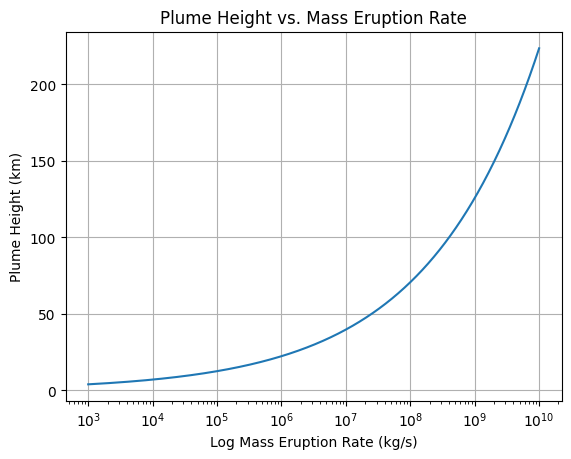

In [3]:
### 8/7/23 in class, (4a)

import numpy as np
import matplotlib.pyplot as plt

def plume_simulation(mass_eruption_rate):
    return 5*(mass_eruption_rate/2500) ** 0.25

#Mass eruption rates in kg/s
mass_eruption_rates = np.logspace(3, 10, 1000)  # Logarithmic scale from 10^3 to 10^10
plume_heights = plume_simulation(mass_eruption_rates)

plt.semilogx(mass_eruption_rates, plume_heights)
plt.xlabel("Log Mass Eruption Rate (kg/s)")
plt.ylabel("Plume Height (km)")
plt.title("Plume Height vs. Mass Eruption Rate")
plt.grid(True)
plt.show()

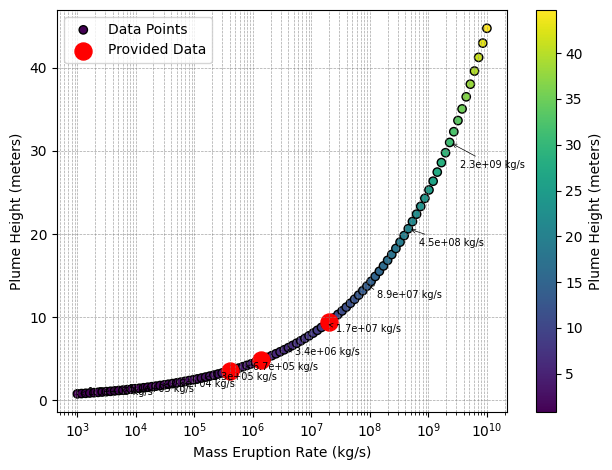

In [4]:
### 8/7/23 in class, (4b)

def plume_simulation(mass_eruption_rate):
    return (mass_eruption_rate/2500) ** 0.25

## Mass eruption rates in kg/s
mass_eruption_rates = np.logspace(3, 10, 100)  # Logarithmic scale from 10^3 to 10^10
plume_heights = plume_simulation(mass_eruption_rates)

# Provided data: Volcano, Plume Height (km), Mass Eruption Rate (kg/s)
data = [
    ["St. Helens, 2005", 9, 4.00e5],    ## name of eruption, height (km), MER (kg/s)
    ["St. Helens, 7/1980", 10.3, 1.40e6],
    ["St. Helens, 5/1980", 10.2, 2.00e7],
]

# Extract volcano names, heights, and eruption rates from the data
volcanoes, heights, eruption_rates = zip(*data)

# Convert heights from km to meters
heights_meters = [height * 1000 for height in heights]

# Create a custom color map
cmap = plt.get_cmap('viridis')

# Create the scatter plot with custom color map
plt.scatter(mass_eruption_rates, plume_heights, c=plume_heights, cmap=cmap, edgecolors='k', label='Data Points')
plt.colorbar(label='Plume Height (meters)')

# Annotate the data points with their values
for mass, height in zip(mass_eruption_rates[::10], plume_heights[::10]):
    plt.annotate(f"{mass:.1e} kg/s", xy=(mass, height), xytext=(mass * 1.5, height * 0.9), arrowprops=dict(arrowstyle="->", lw=0.5), fontsize=7)

# Add vertical lines to mark specific mass eruption rates
# specific_mass_rates = [1e3, 1e5, 1e9]
# for rate in specific_mass_rates:
#     plt.axvline(rate, linestyle='--', color='gray', lw=2)

plt.xscale('log')
plt.xlabel("Mass Eruption Rate (kg/s)")
plt.ylabel("Plume Height (meters)")

# Customize the background grid style
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Calculate and plot the provided data on top of the current plot
provided_eruption_rates = [rate for _, _, rate in data]
provided_plume_heights = [plume_simulation(rate) for _, _, rate in data]
plt.scatter(provided_eruption_rates, provided_plume_heights, c='red', marker='o', s=150, label='Provided Data')

plt.legend()
plt.tight_layout()
plt.show()